# 

In [2]:
#librerias
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np
from scipy.signal import detrend
from fastdtw import dtw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


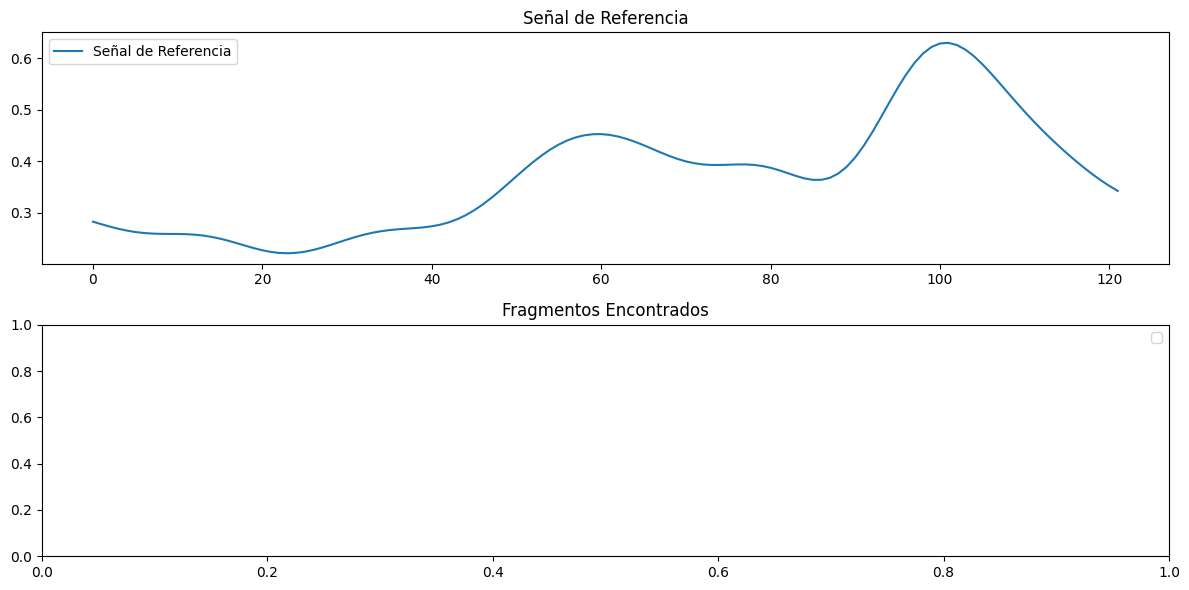

In [5]:


# Cargar el archivo de la señal de referencia
signal_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\fragmentos_por_golpes_jugador\derecha_J1\derecha_J1_9.csv"
reference_signal = pd.read_csv(signal_path)

# Cargar el archivo general con muchas señales
general_path = r"C:\Users\Holacons\OneDrive - Vueling Airlines, S.A\Escritorio\TFM\Proves Stroke Count\Jugador 1\Entegistraments J1\J1 Dretes ACC.csv"
general_signals = pd.read_csv(general_path)

# Función para calcular DTW (puedes reemplazarla con cualquier implementación de DTW que prefieras)
def dtw_distance(s1, s2):
    DTW = np.zeros((len(s1)+1, len(s2)+1))
    for i in range(1, len(s1)+1):
        DTW[i, 0] = np.inf
    for i in range(1, len(s2)+1):
        DTW[0, i] = np.inf
    DTW[0, 0] = 0

    for i in range(1, len(s1)+1):
        for j in range(1, len(s2)+1):
            cost = np.abs(s1[i-1] - s2[j-1])
            DTW[i, j] = cost + min(DTW[i-1, j], DTW[i, j-1], DTW[i-1, j-1])
    
    return DTW[len(s1), len(s2)]

reference_values = reference_signal['ACC_X'].values

# Fragmentar las señales en el archivo general
window_size = len(reference_values)
step_size = 1  # Puedes ajustar este valor según tus necesidades
fragments = []

for start in range(0, len(general_signals) - window_size + 1, step_size):
    end = start + window_size
    fragment = general_signals['ACC_X'][start:end].values
    
    # Calcula la distancia DTW entre la señal de referencia y el fragmento
    distance = dtw_distance(reference_values, fragment)
    
    # Si la distancia es menor que un umbral, guardar el fragmento
    threshold = 10 
    if distance < threshold:
        fragments.append((start, end, fragment))

# Graficar la señal de referencia y los fragmentos
plt.figure(figsize=(12, 6))

# Graficar la señal de referencia
plt.subplot(2, 1, 1)
plt.plot(reference_values, label='Señal de Referencia')
plt.title('Señal de Referencia')
plt.legend()

# Graficar los fragmentos encontrados
plt.subplot(2, 1, 2)
for (start, end, fragment) in fragments:
    plt.plot(range(start, end), fragment, label=f'Fragmento {start}-{end}')
plt.title('Fragmentos Encontrados')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:

carpeta_1 = 'C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1'

carpeta_2 = 'C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 2/Enregistraments J2'

carpeta_3 = 'C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 3/Enregistraments J3'

carpeta_4 = 'C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 4/Enregistraments J4'

carpeta_5 = 'C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 5/Enregistraments J5'

carpeta_6 = 'C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 6/Enregistraments J6'


In [3]:

dfs = []

# Iterar sobre los archivos en la carpeta 1
for archivo in os.listdir(carpeta_1):
    if archivo.endswith('.csv'):  # solo csv
        ruta_archivo = os.path.join(carpeta_1, archivo)
        # Leer el archivo CSV y agregarlo al dataframe
        df = pd.read_csv(ruta_archivo)

        df['type'] = archivo
        dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df_raw_1 = pd.concat(dfs, ignore_index=True)




In [4]:
df_raw_1 = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1/J1 Dretes ACC.csv')

In [5]:
x = df_raw_1['ACC_X'].values
y = df_raw_1['ACC_Y'].values
z = df_raw_1['ACC_Z'].values

In [12]:
y_signal = np.array(y_signal).flatten()
template = np.array(template).flatten()


In [15]:
print(np.ndim(y_signal))
print(np.ndim(template))


1
1


In [18]:
print("y_signal:", y_signal[:10])  # Imprimir los primeros 10 valores de y_signal
print("template:", template[:10])  # Imprimir los primeros 10 valores de template


y_signal: [0.08027538 0.07437686 0.07627953 0.08060608 0.08851856 0.09467364
 0.08991457 0.08169164 0.07858428 0.08351617]
template: [0.08262278 0.08239737 0.08218643 0.08200025 0.08186994 0.08180996
 0.08180346 0.08183062 0.08189402 0.08201595]


In [2]:

distance, path = dtw(y_signal, template, dist=euclidean)


template_start_idx = path[0][1]
template_end_idx = path[-1][1]


plt.figure(figsize=(15, 5))
plt.plot(y_signal)
plt.plot(range(template_start_idx, template_start_idx + len(template)), template, label='Plantilla', linewidth=2)
plt.legend()
plt.title('Identificación de la Señal')
plt.show()

print(f"Distancia DTW: {distance}")
print(f"Posición de la plantilla: desde el índice {template_start_idx} hasta el índice {template_end_idx}")


NameError: name 'dtw' is not defined

In [3]:


def dtw_distance(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    
    for i in range(n + 1):
        for j in range(m + 1):
            dtw_matrix[i, j] = np.inf
    
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s[i - 1] - t[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    
    return dtw_matrix[n, m]


y_signal = np.squeeze(y_signal)
template = np.squeeze(template)


distance = dtw_distance(y_signal, template)

print(f"Distancia DTW: {distance}")


NameError: name 'np' is not defined

In [26]:


def dtw_distance(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    
    for i in range(n + 1):
        for j in range(m + 1):
            dtw_matrix[i, j] = np.inf
    
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s[i - 1] - t[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    
    return dtw_matrix[n, m]


y_signal = np.squeeze(y_signal)
template = np.squeeze(template)


threshold = 10  

fragments = []
start_idx = 0

for i in range(1, len(y_signal) - len(template) + 2):
    window = y_signal[start_idx:i+len(template)-1]
    distance = dtw_distance(window, template)
    
    if distance > threshold:
        fragments.append(window)
        start_idx = i


if start_idx < len(y_signal):
    fragments.append(y_signal[start_idx:])


for i, fragment in enumerate(fragments):
    print(f"Fragmento {i + 1}: {fragment}")


Fragmento 1: [0.08027538 0.07437686 0.07627953 0.08060608 0.08851856 0.09467364
 0.08991457 0.08169164 0.07858428 0.08351617 0.08370667 0.08502478
 0.08590642 0.0862597  0.0859785  0.08509586 0.08465639 0.08485531
 0.08522827 0.08500676 0.0842752  0.08376182 0.08382851 0.0840659
 0.08396086 0.08368787 0.08339893 0.08324143 0.08313358 0.08319733
 0.08330542 0.08315544 0.08241093 0.08151738 0.08393939 0.08381281
 0.08362602 0.08339135 0.08313138 0.0828659  0.08262278 0.08239737
 0.08218643 0.08200025 0.08186994 0.08180996 0.08180346 0.08183062
 0.08189402 0.08201595 0.08219578 0.08242598 0.08268749 0.08297221
 0.08326113 0.08354296 0.08382306 0.08412196 0.08443058 0.08472872
 0.08500354 0.08524697 0.0854648  0.08564719 0.08580948 0.08597199
 0.0861388  0.08629209 0.08641406 0.08649741 0.08655029 0.08657712
 0.08657905 0.08655555 0.08649698 0.08639904 0.08626153 0.08610374
 0.08594523 0.085807   0.08569755 0.0856204  0.08556139 0.08552188
 0.08550135 0.0855041  0.08554291 0.08563205 0.085

Fragmento 314: [0.07347126 0.07346412 0.07382864 0.07449706 0.07535072 0.07624682
 0.07704493 0.07768205 0.07821582 0.07883299 0.07980366 0.08141461
 0.08400357 0.0881607  0.0948485  0.1053425  0.1207568  0.1416275
 0.16848617 0.20085218 0.23878459 0.2815234  0.32859467 0.37912556
 0.43041344 0.47893562 0.522324   0.56024217 0.59222287 0.6194588
 0.64158948 0.65932367 0.67191297 0.6781168  0.67884534 0.67575656
 0.67045825 0.66268319 0.65072007 0.63252164 0.60664964 0.57290924
 0.53256106 0.48601492 0.43546792 0.38182237 0.32662611 0.27041554
 0.21538702 0.16624249 0.12730997 0.10037381 0.08478661 0.07794199
 0.07657366 0.07874273 0.08261369 0.08627283 0.08758831 0.08609563
 0.08233438 0.07670892 0.06945447 0.06087406 0.05146812 0.04173606
 0.03231052 0.02379326 0.01674789 0.01150604 0.00823544 0.00706154
 0.00792111 0.0105668  0.01461858 0.01967737 0.02536682 0.03136591
 0.0373399  0.04305843 0.04838334 0.05330923 0.05785781 0.0620369
 0.06583008 0.06924597 0.07232053 0.07504187 0.077

Fragmento 566: [0.52914038 0.46333606 0.39548397 0.32756809 0.26351495 0.20807324
 0.16495129 0.13594364 0.12032632 0.11414045 0.11256011 0.112593
 0.11271206 0.11237111 0.11069939 0.1074245  0.10266732 0.09680142
 0.09039413 0.08382495 0.07750385 0.07183904 0.067273   0.06398043
 0.06199548 0.06122748 0.06152631 0.06272333 0.06469556 0.06729866
 0.07032402 0.07353571 0.07672268 0.07974734 0.08250713 0.08497182
 0.08714009 0.08901248 0.09057786 0.09182942 0.09276795 0.09339812
 0.09372154 0.09372704 0.09340131 0.09275297 0.09181167 0.09063645
 0.08928661 0.08781877 0.08629538 0.08476928 0.08329845 0.08193863
 0.08074142 0.07974601 0.07896059 0.07840861 0.07810458 0.07803267
 0.07812571 0.07828969 0.07846095 0.07861925 0.07878383 0.07903117
 0.07955144 0.08068574 0.08287954 0.08666441 0.09274856 0.10221547
 0.11668765 0.13756795 0.16581288 0.20167261 0.2443504  0.29413605
 0.34964113 0.40998487 0.4723622  0.53350824 0.59051392 0.6421806
 0.68835269 0.72819922 0.76231663 0.78912788 0.809

Fragmento 852: [0.02759064 0.0311323  0.03648173 0.04320506 0.05075472 0.05848058
 0.06574365 0.0719825  0.07681347 0.08003729 0.08162959 0.08176148
 0.08081836 0.07928637 0.07761446 0.07617053 0.07526867 0.07516487
 0.07603859 0.07797564 0.08078947 0.08407777 0.08730751 0.09014861
 0.09249867 0.09439262 0.09584242 0.09683574 0.09736707 0.09751314
 0.09746703 0.09746147 0.09771271 0.09832962 0.09935113 0.10074715
 0.10250351 0.10458572 0.10696266 0.10956548 0.11228302 0.11491187
 0.1171725  0.1187793  0.11948941 0.11921647 0.1179725  0.11585098
 0.11289994 0.10912823 0.10456695 0.09937296 0.09380866 0.08818381
 0.0827927  0.07784007 0.07342485 0.06961768 0.06658825 0.06453332
 0.06351841 0.06339811 0.0639535  0.06500842 0.0664399  0.06811245
 0.06985017 0.07146771 0.07280514 0.07379363 0.07452654 0.0752632
 0.07638248 0.07836355 0.08223032 0.09005174 0.10451857 0.12778527
 0.16043907 0.20151933 0.24895446 0.30148643 0.3574751  0.41586361
 0.47339537 0.52663128 0.57264912 0.61243992 0.6

Fragmento 1081: [0.04350625 0.04320061 0.0438588  0.04500146 0.04645687 0.0482655
 0.05043896 0.05295647 0.05570545 0.05858042 0.06147736 0.0643132
 0.06701206 0.06946767 0.07158966 0.07330185 0.0745883  0.07549393
 0.07614664 0.07673973 0.07750592 0.0786874  0.08045395 0.08285231
 0.08580347 0.08911836 0.09251962 0.09569019 0.09833344 0.10022339
 0.10121326 0.10125036 0.10044168 0.09896722 0.09705606 0.09490948
 0.09268804 0.09053426 0.0885604  0.08682336 0.08529576 0.0839171
 0.08265864 0.08153453 0.08057517 0.07980276 0.07921892 0.07883318
 0.07863895 0.0786243  0.07878686 0.07915695 0.07983518 0.08106382
 0.08320919 0.08690373 0.09321187 0.10358754 0.11953331 0.14174223
 0.17050793 0.20521886 0.24517012 0.29009872 0.33928785 0.39253563
 0.44706039 0.4996197  0.54777599 0.59206339 0.63297264 0.67078305
 0.70560419 0.73643336 0.76303937 0.78310804 0.79663668 0.80413789
 0.80645041 0.80324275 0.79258299 0.77280231 0.74246014 0.7017304
 0.65313795 0.59845746 0.54026686 0.48046277 0.419

Fragmento 1363: [0.0705764  0.07155319 0.07270094 0.07390574 0.07513371 0.07636042
 0.07757378 0.07873181 0.0797966  0.08076292 0.08163884 0.08245195
 0.08322024 0.08394851 0.08463664 0.08526588 0.08582219 0.08627321
 0.08658333 0.0867143  0.08664513 0.08635919 0.08584718 0.08511724
 0.08420463 0.08319022 0.08215214 0.08117012 0.08032132 0.07966894
 0.07922657 0.07897323 0.07887252 0.07890063 0.07904021 0.07927721
 0.07959627 0.07998432 0.08043181 0.08094344 0.0815279  0.08218162
 0.08286838 0.08353547 0.08413171 0.08462247 0.08498358 0.08516766
 0.08510941 0.08474787 0.08404913 0.08299982 0.08161008 0.0799584
 0.07817781 0.07639493 0.07469731 0.07317827 0.07200745 0.0714822
 0.0720375  0.07411068 0.07795796 0.0837943  0.09236498 0.1052157
 0.1242445  0.15077909 0.18452591 0.22457876 0.26892319 0.31728164
 0.36820298 0.41962584 0.46918047 0.51380293 0.55140419 0.58165876
 0.60599322 0.62506368 0.64044428 0.65116694 0.65795958 0.66133569
 0.66093845 0.65722565 0.65069189 0.64137652 0.62

Fragmento 1620: [0.4241617  0.37652543 0.32791309 0.2792768  0.23359302 0.19388127
 0.16213913 0.1392854  0.12488899 0.11586937 0.11023662 0.10746359
 0.10722724 0.10851573 0.10951438 0.10935431 0.10800581 0.105614
 0.10231927 0.09824533 0.09355462 0.08849707 0.08330365 0.07820258
 0.07348511 0.06943064 0.06625419 0.06398921 0.06262668 0.06214883
 0.06253695 0.06370252 0.06550444 0.06775086 0.0702169  0.07271002
 0.07507261 0.07720139 0.07905188 0.08062325 0.08196051 0.08311876
 0.08413745 0.08504689 0.08585056 0.08651584 0.08698361 0.08722698
 0.08725617 0.08708876 0.08673429 0.08624446 0.0857384  0.08534195
 0.08513016 0.08511726 0.08530415 0.08568146 0.08622008 0.08683318
 0.08740035 0.08779617 0.08792034 0.08769745 0.08706196 0.08601598
 0.08466755 0.08317288 0.08169879 0.08038582 0.07935228 0.07867955
 0.07838445 0.07842968 0.07872946 0.07915466 0.07956926 0.07987626
 0.08002464 0.07998959 0.07976326 0.07936218 0.07881892 0.07818762
 0.07758798 0.07727283 0.0777265  0.07984225 0.0

Fragmento 1905: [0.05444918 0.04885905 0.04464626 0.04197981 0.04094852 0.04161404
 0.04386107 0.04740626 0.05186588 0.05683928 0.06197687 0.06695838
 0.0715171  0.07543307 0.07855062 0.0808245  0.08233283 0.08324152
 0.08373612 0.08401336 0.08424974 0.08462203 0.08519332 0.08585212
 0.08641665 0.08674782 0.08679263 0.08655798 0.08611074 0.08563408
 0.08548468 0.08601807 0.08758221 0.09045867 0.09481238 0.10063765
 0.10769758 0.11551818 0.12343844 0.13073293 0.1367092  0.14088331
 0.1429083  0.14259542 0.13990371 0.13498839 0.12826359 0.12036271
 0.11202194 0.10386147 0.0963214  0.08971475 0.0843153  0.08027605
 0.07760994 0.07615273 0.07566272 0.07583628 0.07642716 0.07728662
 0.07836558 0.07967196 0.08123639 0.08314093 0.0855689  0.0890321
 0.09464983 0.10413522 0.11944843 0.14165026 0.17159994 0.20899613
 0.25278219 0.30161866 0.35460575 0.41168055 0.47098544 0.5287211
 0.58177878 0.63002077 0.67380488 0.71414104 0.75164648 0.78686848
 0.81921069 0.84614409 0.86621695 0.88035668 0.8

C:\Users\Holacons\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


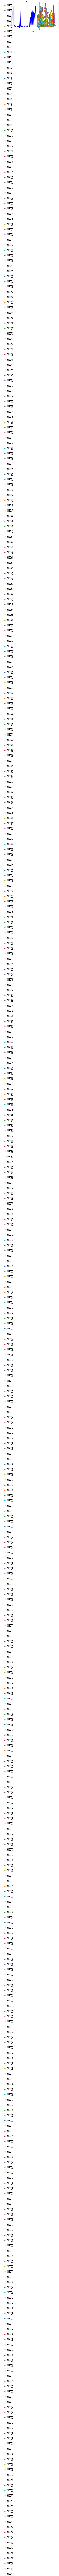

In [27]:


def dtw_distance(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    
    for i in range(n + 1):
        for j in range(m + 1):
            dtw_matrix[i, j] = np.inf
    
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s[i - 1] - t[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    
    return dtw_matrix[n, m]


y_signal = np.squeeze(y_signal)
template = np.squeeze(template)


threshold = 10

fragments = []
start_idx = 0

for i in range(1, len(y_signal) - len(template) + 2):
    window = y_signal[start_idx:i+len(template)-1]
    distance = dtw_distance(window, template)
    
    if distance > threshold:
        fragments.append(window)
        start_idx = i


if start_idx < len(y_signal):
    fragments.append(y_signal[start_idx:])

plt.figure(figsize=(12, 6))
plt.plot(y_signal, label='Señal original', color='blue')

for i, fragment in enumerate(fragments):
    plt.plot(range(start_idx + i, start_idx + i + len(fragment)), fragment, label=f'Fragmento {i + 1}', linestyle='--', marker='o')

plt.title('Fragmentación de la señal')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
dfs = []

for archivo in os.listdir(carpeta_2):
    if archivo.endswith('.csv'):  
        ruta_archivo = os.path.join(carpeta_1, archivo)
        df = pd.read_csv(ruta_archivo)
        df['type'] = archivo
        dfs.append(df)

df_raw_1 = pd.concat(dfs, ignore_index=True)


In [ ]:

dfs = []

for archivo in os.listdir(carpeta_2):
    if archivo.endswith('.csv'):  
        ruta_archivo = os.path.join(carpeta_2, archivo)
        df = pd.read_csv(ruta_archivo)
        df['type'] = archivo
        dfs.append(df)

df_raw_2 = pd.concat(dfs, ignore_index=True)



In [ ]:
df_raw_1['type'].describe()

In [ ]:
tipos_unicos = df_raw_1['type'].unique()
cantidad_tipos = len(tipos_unicos)

print("Tipos únicos en 'type':")
print(tipos_unicos)
print("\nCantidad de tipos únicos:", cantidad_tipos)


In [ ]:

j1vracc = df_raw_1[df_raw_1['type'] == 'J1 VR ACC.csv']
j1dretesacc = df_raw_1[df_raw_1['type'] == 'J1 Dretes ACC.csv']
j1revesacc = df_raw_1[df_raw_1['type'] == 'J1 Reves ACC.csv']
j1vdacc = df_raw_1[df_raw_1['type'] == 'J1 VD ACC.csv']
j1smashacc = df_raw_1[df_raw_1['type'] == 'J1 Smash ACC.csv']
j1serveacc = df_raw_1[df_raw_1['type'] == 'J1 Serve ACC.csv']







In [ ]:

template =  y_signal[40:140]  


In [ ]:
y_signal = np.array(y_signal).flatten()
template = np.array(template).flatten()


In [ ]:
print(np.ndim(y_signal))
print(np.ndim(template))

In [ ]:
print("y_signal:", y_signal[:10]) 
print("template:", template[:10])  


In [ ]:

distance, path = dtw(y_signal, template, dist=euclidean)


template_start_idx = path[0][1]
template_end_idx = path[-1][1]

# Graficar la señal del ECG y la plantilla
plt.figure(figsize=(15, 5))
plt.plot(y_signal, label='Señal')
plt.plot(range(template_start_idx, template_start_idx + len(template)), template, label='Plantilla', linewidth=2)
plt.legend()

plt.show()


In [ ]:


def dtw_distance(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    
    for i in range(n + 1):
        for j in range(m + 1):
            dtw_matrix[i, j] = np.inf
    
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s[i - 1] - t[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    
    return dtw_matrix[n, m]

y_signal = np.squeeze(y_signal)
template = np.squeeze(template)

distance = dtw_distance(y_signal, template)

print(f"Distancia DTW: {distance}")

In [ ]:

def dtw_distance(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    
    for i in range(n + 1):
        for j in range(m + 1):
            dtw_matrix[i, j] = np.inf
    
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s[i - 1] - t[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    
    return dtw_matrix[n, m]

y_signal = np.squeeze(y_signal)
template = np.squeeze(template)

threshold = 10 

fragments = []
start_idx = 0

for i in range(1, len(y_signal) - len(template) + 2):
    window = y_signal[start_idx:i+len(template)-1]
    distance = dtw_distance(window, template)
    
    if distance > threshold:
        fragments.append(window)
        start_idx = i

if start_idx < len(y_signal):
    fragments.append(y_signal[start_idx:])

for i, fragment in enumerate(fragments):
    print(f"Fragmento {i + 1}: {fragment}")


In [ ]:

def dtw_distance(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    
    for i in range(n + 1):
        for j in range(m + 1):
            dtw_matrix[i, j] = np.inf
    
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s[i - 1] - t[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    
    return dtw_matrix[n, m]

y_signal = np.squeeze(y_signal)
template = np.squeeze(template)

threshold = 10  

fragments = []
start_idx = 0

for i in range(1, len(y_signal) - len(template) + 2):
    window = y_signal[start_idx:i+len(template)-1]
    distance = dtw_distance(window, template)
    
    if distance > threshold:
        fragments.append(window)
        start_idx = i


if start_idx < len(y_signal):
    fragments.append(y_signal[start_idx:])


plt.figure(figsize=(12, 6))
plt.plot(y_signal, label='Señal original', color='blue')

for i, fragment in enumerate(fragments):
    plt.plot(range(start_idx + i, start_idx + i + len(fragment)), fragment, label=f'Fragmento {i + 1}', linestyle='--', marker='o')

plt.title('Fragmentación de la señal')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

dfs = []

for archivo in os.listdir(carpeta_2):
    if archivo.endswith('.csv'):  
        ruta_archivo = os.path.join(carpeta_2, archivo)

        df = pd.read_csv(ruta_archivo)

        df['type'] = archivo
        dfs.append(df)


df_raw_2 = pd.concat(dfs, ignore_index=True)
